In [ ]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import time

In [ ]:
data = pd.read_excel('Online_Retail.xlsx')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
data.Country.unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
# Stripping extra spaces in the description
data['Description'] = data['Description'].str.strip()

# Dropping the rows without any invoice number
data.dropna(axis = 0, subset =['InvoiceNo'], inplace = True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

# Dropping all transactions which were done on credit
data = data[~data['InvoiceNo'].str.contains('C')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
d_france=data[data['Country']=="France"]
len(d_france.Description.unique())
for i in d_france.Description.unique():
  print(i)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: ignored

In [ ]:
# Transactions done in France
basket_France = (data[data['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Transactions done in the United Kingdom
basket_UK = (data[data['Country'] =="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

# Transactions done in Portugal
basket_Por = (data[data['Country'] =="Portugal"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

#Transactions done in Sweden
basket_Sweden = (data[data['Country'] =="Sweden"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

basket=(data[data['Country'] !="United Kingdom"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
d={}

for i in basket_France.columns:
  d[i]=basket_France[i].sum()
d

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'10 COLOUR SPACEBOY PEN': 336.0,
 '12 COLOURED PARTY BALLOONS': 120.0,
 '12 EGG HOUSE PAINTED WOOD': 2.0,
 '12 MESSAGE CARDS WITH ENVELOPES': 24.0,
 '12 PENCIL SMALL TUBE WOODLAND': 197.0,
 '12 PENCILS SMALL TUBE RED RETROSPOT': 149.0,
 '12 PENCILS SMALL TUBE SKULL': 155.0,
 '12 PENCILS TALL TUBE POSY': 24.0,
 '12 PENCILS TALL TUBE RED RETROSPOT': 109.0,
 '12 PENCILS TALL TUBE WOODLAND': 72.0,
 '15CM CHRISTMAS GLASS BALL 20 LIGHTS': 8.0,
 '16 PIECE CUTLERY SET PANTRY DESIGN': 2.0,
 '18PC WOODEN CUTLERY SET DISPOSABLE': 32.0,
 '20 DOLLY PEGS RETROSPOT': 41.0,
 '200 RED + WHITE BENDY STRAWS': 24.0,
 '3 HOOK HANGER MAGIC GARDEN': 12.0,
 '3 PIECE SPACEBOY COOKIE CUTTER SET': 96.0,
 "3 RAFFIA RIBBONS 50'S CHRISTMAS": 10.0,
 '3 STRIPEY MICE FELTCRAFT': 3.0,
 '3 TIER CAKE TIN RED AND CREAM': 4.0,
 '3 TRADITIONAl BISCUIT CUTTERS  SET': 36.0,
 '36 DOILIES DOLLY GIRL': 36.0,
 '36 DOILIES VINTAGE CHRISTMAS': 12.0,
 '36 FOIL HEART CAKE CASES': 18.0,
 '36 FOIL STAR CAKE CASES': 24.0,
 '36 PENCILS 

In [ ]:
# Defining the hot encoding function to make the data suitable
# for the concerned libraries
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

# Encoding the datasets
basket_encoded = basket_France.applymap(hot_encode)
basket_France = basket_encoded

basket_encoded = basket_UK.applymap(hot_encode)
basket_UK = basket_encoded

basket_encoded = basket_Por.applymap(hot_encode)
basket_Por = basket_encoded

basket_encoded = basket_Sweden.applymap(hot_encode)
basket_Sweden = basket_encoded

basket_encoded = basket.applymap(hot_encode)
basket = basket_encoded


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
algo=[]
times=[]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Building the model
start=time.time()
frq_items = apriori(basket_France, min_support = 0.05, use_colnames = True)
end=time.time()
algo.append('100%')
times.append(end-start)
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules)

                                           antecedents  \
44                        (JUMBO BAG WOODLAND ANIMALS)   
259  (PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...   
271  (PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...   
302  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
301  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...   
..                                                 ...   
37                                           (POSTAGE)   
27                                           (POSTAGE)   
97                                           (POSTAGE)   
227                                          (POSTAGE)   
214                                          (POSTAGE)   

                                           consequents  antecedent support  \
44                                           (POSTAGE)            0.076531   
259                                          (POSTAGE)            0.051020   
271                                          (POSTAGE)            0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frq_items = apriori(basket_Por, min_support = 0.05, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                             antecedents                          consequents  \
1170  (SET 12 COLOUR PENCILS DOLLY GIRL)     (SET 12 COLOUR PENCILS SPACEBOY)   
1171    (SET 12 COLOUR PENCILS SPACEBOY)   (SET 12 COLOUR PENCILS DOLLY GIRL)   
1172  (SET 12 COLOUR PENCILS DOLLY GIRL)   (SET OF 4 KNICK KNACK TINS LONDON)   
1173  (SET OF 4 KNICK KNACK TINS LONDON)   (SET 12 COLOUR PENCILS DOLLY GIRL)   
1174  (SET 12 COLOUR PENCILS DOLLY GIRL)  (SET OF 4 KNICK KNACK TINS POPPIES)   

      antecedent support  consequent support   support  confidence       lift  \
1170            0.051724            0.051724  0.051724         1.0  19.333333   
1171            0.051724            0.051724  0.051724         1.0  19.333333   
1172            0.051724            0.051724  0.051724         1.0  19.333333   
1173            0.051724            0.051724  0.051724         1.0  19.333333   
1174            0.051724            0.051724  0.051724         1.0  19.333333   

      leverage  conviction

In [ ]:
frq_items = apriori(basket_Sweden, min_support = 0.05, use_colnames = True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                        antecedents                        consequents  \
0     (12 PENCILS SMALL TUBE SKULL)      (PACK OF 72 SKULL CAKE CASES)   
1     (PACK OF 72 SKULL CAKE CASES)      (12 PENCILS SMALL TUBE SKULL)   
4           (36 DOILIES DOLLY GIRL)     (ASSORTED BOTTLE TOP  MAGNETS)   
5    (ASSORTED BOTTLE TOP  MAGNETS)            (36 DOILIES DOLLY GIRL)   
180  (CHILDRENS CUTLERY DOLLY GIRL)  (CHILDRENS CUTLERY CIRCUS PARADE)   

     antecedent support  consequent support   support  confidence  lift  \
0              0.055556            0.055556  0.055556         1.0  18.0   
1              0.055556            0.055556  0.055556         1.0  18.0   
4              0.055556            0.055556  0.055556         1.0  18.0   
5              0.055556            0.055556  0.055556         1.0  18.0   
180            0.055556            0.055556  0.055556         1.0  18.0   

     leverage  conviction  zhangs_metric  
0    0.052469         inf            1.0  
1    0.052469     

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frq_items=fpgrowth(basket_France,min_support=0.05,use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules)

                                           antecedents  \
115  (PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...   
273  (PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...   
328                       (JUMBO BAG WOODLAND ANIMALS)   
222  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
221  (SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...   
..                                                 ...   
183                                          (POSTAGE)   
99                                           (POSTAGE)   
175                                          (POSTAGE)   
259                                          (POSTAGE)   
204                                          (POSTAGE)   

                                           consequents  antecedent support  \
115                                          (POSTAGE)            0.053571   
273                                          (POSTAGE)            0.051020   
328                                          (POSTAGE)            0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
frq_items=fpgrowth(basket_Por,min_support=0.05,use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                             antecedents  \
13225    (PLASTERS IN TIN SPACEBOY, LUNCH BAG CARS BLUE)   
13226  (PLASTERS IN TIN SPACEBOY, LUNCH BAG PINK POLK...   
13227  (LUNCH BAG CARS BLUE, PLASTERS IN TIN CIRCUS P...   
13228  (PLASTERS IN TIN CIRCUS PARADE, LUNCH BAG PINK...   
13238  (LUNCH BAG CARS BLUE, PLASTERS IN TIN CIRCUS P...   
...                                                  ...   
88054                                          (POSTAGE)   
88056                                          (POSTAGE)   
88131                                          (POSTAGE)   
88142                                          (POSTAGE)   
94599                                          (POSTAGE)   

                                             consequents  antecedent support  \
13225  (PLASTERS IN TIN CIRCUS PARADE, LUNCH BAG PINK...            0.051724   
13226  (LUNCH BAG CARS BLUE, PLASTERS IN TIN CIRCUS P...            0.051724   
13227  (PLASTERS IN TIN SPACEBOY, LUNCH

In [ ]:
frq_items=fpgrowth(basket_Sweden,min_support=0.05,use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                              antecedents  \
120     (MINI PAINT SET VINTAGE, PACK OF 60 SPACEBOY C...   
121     (MINI PAINT SET VINTAGE, PACK OF 72 RETROSPOT ...   
124     (RETROSPOT TEA SET CERAMIC 11 PC, PACK OF 60 S...   
125     (RETROSPOT TEA SET CERAMIC 11 PC, PACK OF 72 R...   
150     (RETROSPOT TEA SET CERAMIC 11 PC, PACK OF 60 S...   
...                                                   ...   
104606                                          (POSTAGE)   
1342                                            (POSTAGE)   
1347                                            (POSTAGE)   
81604                                           (POSTAGE)   
104363                                          (POSTAGE)   

                                              consequents  antecedent support  \
120     (RETROSPOT TEA SET CERAMIC 11 PC, PACK OF 72 R...            0.055556   
121     (RETROSPOT TEA SET CERAMIC 11 PC, PACK OF 60 S...            0.055556   
124     (MINI PAINT SET 

In [ ]:
import time

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
france_basket=data[data['Country']=="France"]

b1=(france_basket.head(1000)
.groupby(['InvoiceNo', 'Description'])['Quantity']
.sum().unstack().reset_index().fillna(0)
.set_index('InvoiceNo'))

b2=(france_basket.head(2000)
.groupby(['InvoiceNo', 'Description'])['Quantity']
.sum().unstack().reset_index().fillna(0)
.set_index('InvoiceNo'))

b3=(france_basket.head(3000).groupby(['InvoiceNo', 'Description'])['Quantity']
.sum().unstack().reset_index().fillna(0)
.set_index('InvoiceNo'))

b4=(france_basket.head(4000).groupby(['InvoiceNo', 'Description'])['Quantity']
.sum().unstack().reset_index().fillna(0)
.set_index('InvoiceNo'))

b5=(france_basket.head(5000).groupby(['InvoiceNo', 'Description'])['Quantity']
.sum().unstack().reset_index().fillna(0)
.set_index('InvoiceNo'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transactions=[b1,b2,b3,b4,b5]
ap_times=[]
fp_times=[]

for i in transactions:
  b_encoded=i.applymap(hot_encode)

  start=time.time()

  frq_items = apriori(b_encoded, min_support = 0.05, use_colnames = True)
  #rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
  #rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

  end=time.time()

  ap_times.append(end-start)

  start=time.time()

  frq_items=fpgrowth(b_encoded,min_support=0.05,use_colnames=True)
  #rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
  #rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])

  end=time.time()

  fp_times.append(end-start)


"""b1_encoded=b1.applymap(hot_encode)
start=time.time()
frq_items = apriori(b1_encoded, min_support = 0.05, use_colnames = True)
end=time.time()
ap_times.append(end-start)
start=time.time()
frq_items=fpgrowth(b1_encoded,min_support=0.05,use_colnames=True)
end=time.time()
fp_times.append(end-start)

b2_encoded=b2.applymap(hot_encode)
start=time.time()
frq_items = apriori(b2_encoded, min_support = 0.05, use_colnames = True)
end=time.time()
ap_times.append(end-start)
start=time.time()
frq_items=fpgrowth(b2_encoded,min_support=0.05,use_colnames=True)
end=time.time()
fp_times.append(end-start)

b3_encoded=b3.applymap(hot_encode)
start=time.time()
frq_items = apriori(b3_encoded, min_support = 0.05, use_colnames = True)
end=time.time()
ap_times.append(end-start)
start=time.time()
frq_items=fpgrowth(b3_encoded,min_support=0.05,use_colnames=True)
end=time.time()
fp_times.append(end-start)

b4_encoded=b4.applymap(hot_encode)
start=time.time()
frq_items = apriori(b4_encoded, min_support = 0.05, use_colnames = True)
end=time.time()
ap_times.append(end-start)
start=time.time()
frq_items=fpgrowth(b4_encoded,min_support=0.05,use_colnames=True)
end=time.time()
fp_times.append(end-start)

b5_encoded=b5.applymap(hot_encode)
start=time.time()
frq_items = apriori(b5_encoded, min_support = 0.05, use_colnames = True)
end=time.time()
ap_times.append(end-start)
start=time.time()
frq_items=fpgrowth(b5_encoded,min_support=0.05,use_colnames=True)
end=time.time()
fp_times.append(end-start)
"""

print(ap_times)
print(fp_times)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py

[0.06655287742614746, 0.02465987205505371, 0.012608766555786133, 0.011789083480834961, 0.013937234878540039]
[0.02054738998413086, 0.014148473739624023, 0.012171506881713867, 0.014755487442016602, 0.014633417129516602]


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Time Taken\n(in seconds)')

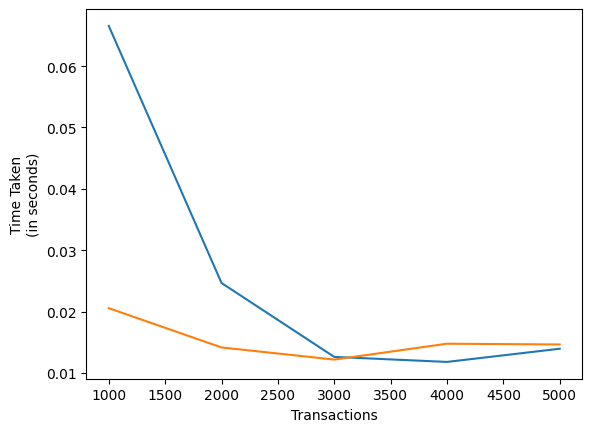

In [ ]:
import matplotlib.pyplot as plt

x=[1000,2000,3000,4000,5000]
plt.plot(x,ap_times)
plt.plot(x,fp_times)
plt.xlabel("Transactions")
plt.ylabel("Time Taken\n(in seconds)")


In [ ]:
basket_France

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
d1=d
d2=d
d3=d
d4=d
n1=int(3/10*len(basket_France.columns))
n2=int(4/10*len(basket_France.columns))
n3=int(5/10*len(basket_France.columns))
n4=int(55/100*len(basket_France.columns))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
while len(d1)>=n1:
  low=d1['10 COLOUR SPACEBOY PEN']
  low_key='10 COLOUR SPACEBOY PEN'

  for des in d1:
    if d1[des]<low:
        low=d1[des]
        low_key=des

  del d1[low_key]

d1_indexes=list(d1.keys())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
while len(d2)>=n1:
  low=d2['10 COLOUR SPACEBOY PEN']
  low_key='10 COLOUR SPACEBOY PEN'

  for des in d2:
    if d2[des]<low:
        low=d2[des]
        low_key=des

  del d2[low_key]
d2_indexes=list(d2.keys())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
while len(d3)>=n1:
  low=d3['10 COLOUR SPACEBOY PEN']
  low_key='10 COLOUR SPACEBOY PEN'

  for des in d1:
    if d3[des]<low:
        low=d3[des]
        low_key=des

  del d3[low_key]
d3_indexes=list(d3.keys())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
while len(d4)>=n1:
  low=d4['10 COLOUR SPACEBOY PEN']
  low_key='10 COLOUR SPACEBOY PEN'

  for des in d4:
    if d4[des]<low:
        low=d4[des]
        low_key=des

  del d4[low_key]
d4_indexes=list(d4.keys())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1=pd.DataFrame()
df_temp=pd.DataFrame()

for i in d1_indexes:
  df_temp=basket_France[basket_France[i]>0]
  df1=pd.concat([df1,df_temp])

df1=df1.drop_duplicates()
df1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
537468,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540365,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540835,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541138,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
544115,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
577512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
546770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2=pd.DataFrame()
df_temp=pd.DataFrame()

for i in d2_indexes:
  df_temp=basket_France[basket_France[i]>0]
  df2=pd.concat([df2,df_temp])

df2=df2.drop_duplicates()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df3=pd.DataFrame()
df_temp=pd.DataFrame()

for i in d3_indexes:
  df_temp=basket_France[basket_France[i]>0]
  df3=pd.concat([df3,df_temp])

df3=df3.drop_duplicates()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df4=pd.DataFrame()
df_temp=pd.DataFrame()

for i in d4_indexes:
  df_temp=basket_France[basket_France[i]>0]
  df4=pd.concat([df4,df_temp])

df4=df4.drop_duplicates()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
basket_encoded = df1.applymap(hot_encode)
df1 = basket_encoded
basket_encoded = df2.applymap(hot_encode)
df2 = basket_encoded
basket_encoded = df3.applymap(hot_encode)
df3 = basket_encoded
basket_encoded = df4.applymap(hot_encode)
df4 = basket_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Applying apriori for top 30%
start=time.time()
frq_items = apriori(df1, min_support = 0.05, use_colnames = True)
end=time.time()
algo.append('30%')
times.append(end-start)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                                           antecedents consequents  \
42                        (JUMBO BAG WOODLAND ANIMALS)   (POSTAGE)   
127                                (RED RETROSPOT CUP)   (POSTAGE)   
161                     (TABLECLOTH RED APPLES DESIGN)   (POSTAGE)   
273  (PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...   (POSTAGE)   
285  (PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...   (POSTAGE)   

     antecedent support  consequent support   support  confidence      lift  \
42             0.081522            0.793478  0.081522         1.0  1.260274   
127            0.051630            0.793478  0.051630         1.0  1.260274   
161            0.051630            0.793478  0.051630         1.0  1.260274   
273            0.054348            0.793478  0.054348         1.0  1.260274   
285            0.057065            0.793478  0.057065         1.0  1.260274   

     leverage  conviction  zhangs_metric  
42   0.016836         inf       0.224852  
127  0.010663     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
#Applying apriori for top 40%
start=time.time()
frq_items = apriori(df2, min_support = 0.05, use_colnames = True)
end=time.time()
algo.append('40%')
times.append(end-start)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                                           antecedents consequents  \
42                        (JUMBO BAG WOODLAND ANIMALS)   (POSTAGE)   
127                                (RED RETROSPOT CUP)   (POSTAGE)   
161                     (TABLECLOTH RED APPLES DESIGN)   (POSTAGE)   
273  (PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...   (POSTAGE)   
285  (PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...   (POSTAGE)   

     antecedent support  consequent support   support  confidence      lift  \
42             0.081522            0.793478  0.081522         1.0  1.260274   
127            0.051630            0.793478  0.051630         1.0  1.260274   
161            0.051630            0.793478  0.051630         1.0  1.260274   
273            0.054348            0.793478  0.054348         1.0  1.260274   
285            0.057065            0.793478  0.057065         1.0  1.260274   

     leverage  conviction  zhangs_metric  
42   0.016836         inf       0.224852  
127  0.010663     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
#Applying apriori for top 50%
start=time.time()
frq_items = apriori(df3, min_support = 0.05, use_colnames = True)
end=time.time()
algo.append('50%')
times.append(end-start)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                                           antecedents consequents  \
42                        (JUMBO BAG WOODLAND ANIMALS)   (POSTAGE)   
127                                (RED RETROSPOT CUP)   (POSTAGE)   
161                     (TABLECLOTH RED APPLES DESIGN)   (POSTAGE)   
273  (PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...   (POSTAGE)   
285  (PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...   (POSTAGE)   

     antecedent support  consequent support   support  confidence      lift  \
42             0.081522            0.793478  0.081522         1.0  1.260274   
127            0.051630            0.793478  0.051630         1.0  1.260274   
161            0.051630            0.793478  0.051630         1.0  1.260274   
273            0.054348            0.793478  0.054348         1.0  1.260274   
285            0.057065            0.793478  0.057065         1.0  1.260274   

     leverage  conviction  zhangs_metric  
42   0.016836         inf       0.224852  
127  0.010663     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
#Applying apriori for top 55%
start=time.time()
frq_items = apriori(df4, min_support = 0.05, use_colnames = True)
end=time.time()
algo.append('55%')
times.append(end-start)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

                                           antecedents consequents  \
42                        (JUMBO BAG WOODLAND ANIMALS)   (POSTAGE)   
127                                (RED RETROSPOT CUP)   (POSTAGE)   
161                     (TABLECLOTH RED APPLES DESIGN)   (POSTAGE)   
273  (PLASTERS IN TIN CIRCUS PARADE, RED TOADSTOOL ...   (POSTAGE)   
285  (PLASTERS IN TIN WOODLAND ANIMALS, RED TOADSTO...   (POSTAGE)   

     antecedent support  consequent support   support  confidence      lift  \
42             0.081522            0.793478  0.081522         1.0  1.260274   
127            0.051630            0.793478  0.051630         1.0  1.260274   
161            0.051630            0.793478  0.051630         1.0  1.260274   
273            0.054348            0.793478  0.054348         1.0  1.260274   
285            0.057065            0.793478  0.057065         1.0  1.260274   

     leverage  conviction  zhangs_metric  
42   0.016836         inf       0.224852  
127  0.010663     

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
apriori=pd.DataFrame(list(zip(algo,times)),columns=['Algorithm','Time Taken'])
apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Algorithm,Time Taken
0,100%,0.021709
1,30%,0.021346
2,40%,0.020291
3,50%,0.020142
4,55%,0.018234
